# Neuronale Netze und Informationstheorie

Obgleich der Erfolg von neuronalen Netzen ungebrochen scheint, sind die internen Funktionsweisen weitgehend unbekannt.

Einen möglichen Erklärungsansatz und ein theoretisches Modell der Dynamiken der Lernprozesse in Deep Neural Networks (DNN) wurde in jüngster Zeit von Naftali Tishby und verschiedenen weiteren Autoren in mehreren Veröffentlichungen geliefert. [1][2]

Basierend auf der Information Bottleneck Theorie wird der Informationsgehalt eines DNN bestimmt und in Relation zu den Eingabe-/Ausgabedaten gesetzt. Tishby verspricht sich davon ein tiefergehendes Verständnis der internen Funktionsweisen und die Bereitstellung eines universellen Frameworks zur Analyse und Bewertung eines trainierten DNN.


## Grundlagen

Im Bereich des Deep Learning, insbesondere bei Supervised Learning, ist man an effektiven Repräsentationen $T(X)$ der Eingabedaten $X$ interessiert mit deren Hilfe optimale Vorhersagen der Labels $Y$ erreichen kann. 
Jede Schicht stellt damit eine Repräsentation der Daten dar, womit von der ersten bis zur letzten Schicht suksezive eine Transformation vom Input-Space in den Label-Space erfolgt.

Betrachtet man nun jede Schicht $T(X)$ als eine einzige Zufallsvariable, entsteht eine Kette von Zuständen die nacheinander durchlaufen werden, eine Markov-Chain. 
Jede dieser Zufallsvariablen $T$, wird durch ihre Encoder $P(T|X)$ und Decoder $P(Y|T)$-Verteilungen charaktarisiert.  


### Entropie 

Grundlage der Informationstheorie ist die von Claude Shannon beschriebene Entropie. Die Entropie beschreibt, vereinfacht gesagt, die Ungewissheit eines Ereignisses. Je vorhersehbarer ein Ereignis ist, desto geringer ist auch die Entropie. Die Entropie wird daher auch manchmal als "Überraschungswert" bezeichnet. 

$H=-\sum_{i=1}^{n}p_i \cdot log_2 p_i$

Zur Berechnung der Entropie bildet man obige Summe. $p_i$ steht in diesem Fall für die Wahrscheinlichkeit der einzelnen Ereignisse. 

Ein sechsseitiger idealer Würfel hat eine Wahrscheinlichkeit von $1/6$ für jedes Ereignis. 
Die Entropie errechnet sich dann mit

$H_{würfel} = - (1/6 \cdot log_2 1/6 + 1/6 \cdot log_2 1/6 + 1/6 \cdot log_2 1/6 + 1/6 \cdot log_2 1/6 + 1/6 \cdot log_2 1/6 + 1/6 \cdot log_2 1/6) = - 6(1/6 \cdot log_2 1/6) \approx 2,585$

Eine ausführlichere und gut aufbereitete Erklärung liefert das folgende Video.

In [4]:
from IPython.display import HTML, IFrame

IFrame(src="https://www.youtube.com/embed/ErfnhcEV1O8", width=560, height=315)

### Transinformation



Auf Grundlage der Entropie kann die Transinformation definiert werden:
$$I(X;Y) = H(X) - H(X|Y) = H(Y) - H(Y|X)$$

Die Transinformation, oder Mutual Information (MI), stellt ein Maß dar, wie sehr eine Zufallsgröße von der anderen abhängt. Damit kann eine Aussage darüber getroffen werden, wie sehr sich die Unsicherheit (bzw. die Entropie) von $X$ verringert, wenn Ereignis $Y$ bekannt ist. 

Die Transinformation ist Null, wenn beide Zufallsgrößen statistisch unabhängig sind, sie sich also nicht gegenseitig beinflussen können. Dagegen wird die Transinformation maximal, wenn sich ein Ereignis komplett aus dem anderen berechnen lässt, also der Zufall keine Rolle spielt, wenn ein Ereignis bekannt ist. 

Tishby nutzt dieses Maß um Aussagen darüber zu treffen, wie hoch der Informationsgehalt einer Schicht $T$ des DNN zu den Eingabedaten $X$ bzw. zu dem Labels $Y$ ist. 


## Information Plane

Dargestellt werden die errechneten Informationen auf der sogenannten Information Plane. Darauf können die Transinformationen der einzelnen Schichten übersitchlich dargestellt werden. 
Es handelt sich um ein 2-Dimensionales Koordinatensystem, welches auf der X-Achse $I(X;T)$ und auf der Y-Ache $I(T;Y)$ darstellt.

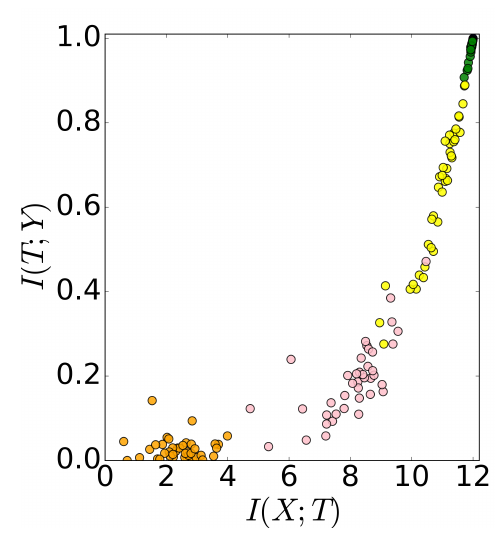

*__Grafik 1__ zeigt die Information Plane von 50 neuronalen Netzen mit jeweils 4 Schichten im Ausgangszustand.
Die Schichten sind durch 4 verschiedene Farben codiert. Die erste Schicht wird in Grün dargestellt, die letzte (Output) Schicht in Orange. (Aus [1])*

Den Ausgangszustand von 50 Netzen mit zufällig initialisierten Gewichten zeigt Grafik 1. Erkennbar ist, dass im initialen Zustand die erste Schicht fast das gesamte "Wissen" des DNN beiträgt. In der letzten Schicht sind kaum noch Informationen vorhanden. Das ist auch nachvollziehbar, da durch die vielen zufällig initialisierten Gewichte sämtliche Zusammenhänge zerstört werden. 

Besonders interessant ist hier die letzte Schicht, da hier schlussendlich die Entscheidung über die Predictions getroffen wird. Befindet sich diese in der rechten oberen Ecke, also wird sowohl $I(X;T)$ als auch $I(T;Y)$ maximiert, sind in der Schicht sämtliche Informationen kodiert, die es über die Trainingsdaten zu wissen gibt. Somit könnten aus der Repräsentation in der Schicht auch die Eingabedaten komplett rekonstruiert werden. Befindet sich die Schicht jedoch in der linken oberen Ecke, sind zwar die Informationen über die Labels vorhanden, jedoch sonst keinerlei Informationen über die Eingabedaten. 

### Animierte Darstellung

Das folgende Video von Shwartz-Ziv zeigt eine animierte Darstellung der Informationplane während des Trainingsprozesses. Die Punkte in Orange stellen die MI der letzten Schicht dar, während die blauen Punkte in der rechten oberen Ecke die erste Schicht darstellen. 

In [3]:
from IPython.display import HTML, IFrame

IFrame(src="https://www.youtube.com/embed/P1A1yNsxMjc", width=560, height=315)

_*Hinweis* In der unteren Hälfte des Videos scheint das Diagramm falsch beschriftet zu sein. Während des Trainingsprozesses muss die Accuracy natürlich steigen._

## Phasen des Lernens

Aus ihren Beobachtungen und Experimenten leiten Shwartz-Ziv und Tishby ab, dass der Lernprozess eines SGD-trainierten DNN in zwei Phasen abläuft. 
In der ersten Phase steigen sowohl $I(X;T)$ als auch $I(T;Y)$ relativ gleichmäßig an. Diese Phase wird von Tishby als "Fitting Phase" bezeichnet, das Modell passt sich den Trainingsdaten an. Der Anpassungsprozess geschieht sehr schnell, so dass er in obigem Video schon nach ca. 650 Epochen abgeschlossen ist. Verbunden ist diese erste Phase mit einem schnellen Anstieg der Accuracy.

In der zweiten Phase steigt der Informatinsgehalt über die Labels weiter, während $I(X;T)$ suksesive abnimmt. Verbunden ist diese Verringerung mit einer deutlich langsameren, aber stetigen, Verbesserung der Accuracy. 
Durch die Abnahme von $I(X;T)$ entsteht ein gewollter Informationsverlust, daher nennt Tishby diese Phase auch "Representation Compression Phase". Da trotz Informationsverlust die Accuracy steigt, scheint es sich bei den verlorenen Informationen nicht um relevante Informationen zu handeln. 

Diese Fokussierung auf Features, die für eine Generalisierung wichtig sind, ist für Tishby der entscheidende Faktor für den großen Erfolg Neuronaler Netze: "The most important part of learning is actually forgetting." [3] Während die Erste Phase noch ein erwartbares Verhalten ist, überrascht die zweite Phase schon eher, da keine expliziten Regularisierungstechniken eingesetzt werden. Folglich muss es sich dabei um ein Phänomen handeln, welches im Optimierungsprozess der SGD-basierten Optimierer implizit enthalten ist. 

### Overfitting

Shwartz-Ziv und Tishby haben diese Phasen auch für kleinere Teilmengen der originalen Trainingsdaten analysiert (Grafik 2). Während das Bild während der Anpassungsphase noch nahezu identisch ist, unterscheidet sich die Komprimierungsphase doch erheblich. Die Repräsentation der Trainingsdaten verliert nicht nur den Bezug zu den Eingabedaten, sondern auch den Zusammenhang zu den Labels. Tishby interpretiert dieses Verhalten als Overfitting, da während der Komprimierung nicht nur das Rauschen, sondern auch relevante Features vergessen werden. Es fehlen in diesem Fall einfach Trainingsdaten für eine korrekte Unterscheidung der Features vom Rauschen. 



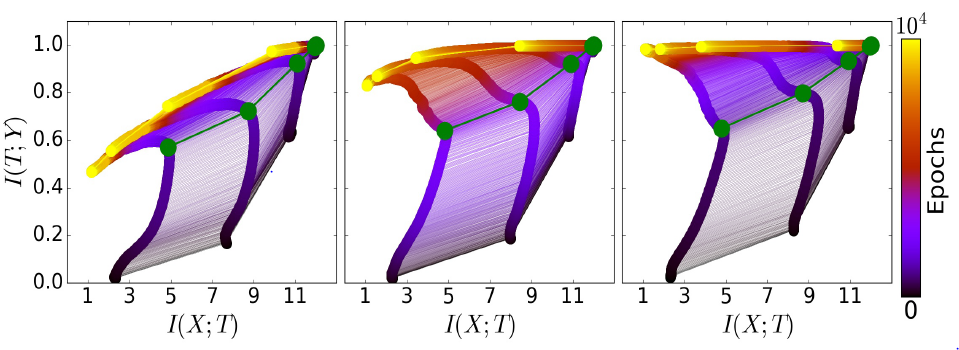

*__Grafik 2__ zeigt die Trainingsdynamiken für 3 verschiedene Teilmengen der vollständigen Trainingsdaten. Links 5%, Mittig 45% und Rechts 85%. Trainiert wurden 10 000 Epochen mit SGD. Das Netz hat eine Layerstruktur von: input-12-10-8-6-4-2-1-output*

Ein ähnliches Verhalten tritt auch bei dem Training eines sehr großen DNN auf. Das Modell hat viel zu viele Parameter für die relativ geringen Informationen der Trainingsdaten und neigt daher zur Überanpassung.

## Umsetzung

Der Quellcode von Shwartz-Ziv und Tishby steht bei Github(https://github.com/ravidziv/IDNNs) bereit und kann zur Durchführung eigener Experiemente genutzt werden.

Der unten stehede Quellcode nutzt das bereitgestellte Framework und erstellt und trainiert ein DNN. Anschließend wird Episodenweise die Transinformation der Layer berechnet und auf der Informationenplane dargestellt. 

Building the network
Loading Data...
sampleLen 1
nDistSmpls 1
layerSizes 10,7,5,4,3
nEpoch 8000
batch 512
nRepeats 1
nEpochInds 274
LastEpochsInds 7999
DataName var_u
lr 0.0004
train_samples [80.]
CPUs 8
directory net_sampleLen=1_nDistSmpls=1_layerSizes=10,7,5,4,3_nEpoch=8000_batch=512_nRepeats=1_nEpochInds=274_LastEpochsInds=7999_DataName=var_u_lr=0.0004
Start running the network
Training network  - 0_0_0_0
Epoch 1 - Test Accuracy: 0.301 Train Accuracy: 0.472
Epoch 500 - Test Accuracy: 0.887 Train Accuracy: 0.936
Epoch 999 - Test Accuracy: 0.880 Train Accuracy: 0.960
Epoch 1498 - Test Accuracy: 0.865 Train Accuracy: 0.969
Epoch 1997 - Test Accuracy: 0.876 Train Accuracy: 0.976
Epoch 2496 - Test Accuracy: 0.893 Train Accuracy: 0.980
Epoch 2995 - Test Accuracy: 0.920 Train Accuracy: 0.982
Epoch 3494 - Test Accuracy: 0.933 Train Accuracy: 0.986
Epoch 3993 - Test Accuracy: 0.936 Train Accuracy: 0.985
Epoch 4492 - Test Accuracy: 0.933 Train Accuracy: 0.988
Epoch 4991 - Test Accuracy: 0.939

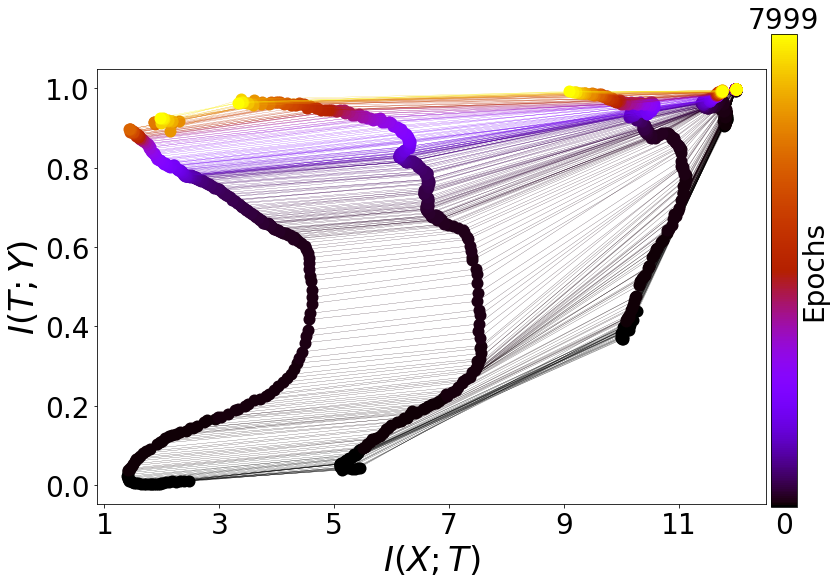

In [2]:
import tensorflow as t
t.get_logger().setLevel('ERROR')

from idnns.networks import information_network as inet, network_paramters
import sys
%matplotlib inline

def main():
    #Bulid the netowrk
    print ('Building the network')
    sys.argv = ['foo']
    args = network_paramters.get_default_parser(None)
    args.num_ephocs = 8000
    args.data_dir = 'data/' 
    args.net_type = '1'
    net = inet.informationNetwork(args=args)
    net.print_information()
    print ('Start running the network')
    net.run_network()
    print ('Saving data')
    net.save_data()
    print ('Ploting figures')
    #Plot the newtork
    net.plot_network()


main()


### Detaillierte Berechnung

Eine detailliete Berechung der MI für ein minimales Netzwerk findet sich in dem folgenden Notebook: [MI Berechnung](./mutual_calculation.ipynb)

## Diskussion

Die Schlussfolerungen von Schwartz-Ziv und Tishby[1] sind nicht unumstritten. 
Saxe et al[4] kritisieren insbesondere, dass die zweite Phase, die Kompressionsphase, nur bei der von Shwartz-Ziv und Tishby verwendeten Sigmoid Aktivierungsfunktion auftritt. In ihren eigenen Experimenten mit der häufiger verwendeten ReLU-Funktion konnten sie die Komprimierungsphase nicht reproduzieren. (https://openreview.net/forum?id=ry_WPG-A-Bild einfügen)

Tishby erklärt dazu, dass es an der Methode liegt, mit der die Autoren versuchen die MI zu berechnen. Durch das notwendige Binning von diskreten Werten der Zufallsverteilung, also das gruppieren von ähnlichen Werten, kann es sehr schnell zu Fehlern kommen. Das Binning ist jedoch notwendig, um aus einer endlichen Mengen an Proben der Zufallsvariablen sinnvolle Ergebnisse zu bekommen. Dieses Binning ist bei einer Sigmoid-Funktion einfacher, da hier die Werte nur zwischen -1 und 1 liegen können. Die ReLU-Funktion ist jedoch nicht beschränkt, daher ist es ungemein schwerer sinnvolle Bins für diese Werte zu finden. Laut Tishby erkennt man bei korrekter Berechnung der MI auch bei ReLU-Netzen die Kompressionsphase. (https://openreview.net/forum?id=ry_WPG-A-)


In einer neuren Veröffentlichung von Noshad et al[5] wird ein neuer Estimator für die Transinformation vorgestellt, der sogenannte EDGE Estimator. In den Tests der Autoren wurde auch das Thema Kompressionsphase bei ReLU-DNN adressiert und mittels des EDGE Estimators auch hier eine Kompressionsphase nachgewiesen und Tishbys Ergebnisse bestätigt. 

# Referenzen

[1] R. Shwartz-Ziv und N. Tishby, „Opening the Black Box of Deep Neural Networks via Information“, arXiv:1703.00810 [cs], März 2017, Zugegriffen: Juli 02, 2019. [Online]. Verfügbar unter: http://arxiv.org/abs/1703.00810.

[2] N. Tishby und N. Zaslavsky, „Deep Learning and the Information Bottleneck Principle“, arXiv:1503.02406 [cs], März 2015, Zugegriffen: Mai 25, 2020. [Online]. Verfügbar unter: http://arxiv.org/abs/1503.02406.

[3]N. Wolchover, „New Theory Cracks Open the Black Box of Deep Learning“, Quanta Magazine. https://www.quantamagazine.org/new-theory-cracks-open-the-black-box-of-deep-learning-20170921/ (zugegriffen Juli 02, 2019).

[4] A. M. Saxe u. a., „On the Information Bottleneck Theory of Deep Learning“, Feb. 2018, Zugegriffen: Okt. 25, 2019. [Online]. Verfügbar unter: https://openreview.net/forum?id=ry_WPG-A-&noteId=ry_WPG-A-.

[5]M. Noshad, Y. Zeng, und A. O. Hero III, „Scalable Mutual Information Estimation using Dependence Graphs“, arXiv:1801.09125 [cs, math, stat], Nov. 2018, Zugegriffen: Mai 26, 2020. [Online]. Verfügbar unter: http://arxiv.org/abs/1801.09125.
